In [4]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
# Load dataset

In [5]:
df = pd.read_csv(r"C:\Users\LENOVO\retail_sales_forecasting\data\retail_store_inventory.csv", parse_dates=['Date'])

In [7]:
store_id = 'S001'
product_id = 'P0001'
df_store_product = df[(df['Store ID'] == store_id) & (df['Product ID'] == product_id)]

In [ ]:
# Aggregate daily units sold

In [8]:
df_daily = df_store_product.groupby('Date').agg({
    'Units Sold': 'sum',
    'Price': 'mean',
    'Discount': 'mean',
    'Holiday/Promotion': 'max'
}).reset_index()

In [ ]:
# Prepare data for Prophet

In [9]:
df_daily = df_daily.rename(columns={'Date':'ds', 'Units Sold':'y'})

In [ ]:
# Convert holiday/promotion to boolean or int

In [10]:
df_daily['Holiday/Promotion'] = df_daily['Holiday/Promotion'].astype(bool)

In [ ]:
# Create holidays DataFrame for Prophet

In [11]:
holidays = pd.DataFrame({
    'holiday': 'holiday',
    'ds': df_daily.loc[df_daily['Holiday/Promotion'], 'ds'],
    'lower_window': 0,
    'upper_window': 1,
})

In [ ]:
# Initialize Prophet model with holidays

In [12]:
model = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)

In [ ]:
# Add regressors

In [13]:
model.add_regressor('Price')
model.add_regressor('Discount')

In [ ]:
# Fit the model

In [14]:
model.fit(df_daily)

21:09:09 - cmdstanpy - INFO - Chain [1] start processing
21:09:10 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
# Create future dataframe

In [15]:
future = model.make_future_dataframe(periods=30)

In [ ]:
# For regressors in future dataframe, set to average or expected values

In [16]:
future = future.merge(df_daily[['ds', 'Price', 'Discount']], how='left', left_on='ds', right_on='ds')
future['Price'] = future['Price'].fillna(df_daily['Price'].mean())
future['Discount'] = future['Discount'].fillna(df_daily['Discount'].mean())

In [ ]:
# Forecast

In [17]:
forecast = model.predict(future)

In [ ]:
# Plot forecast

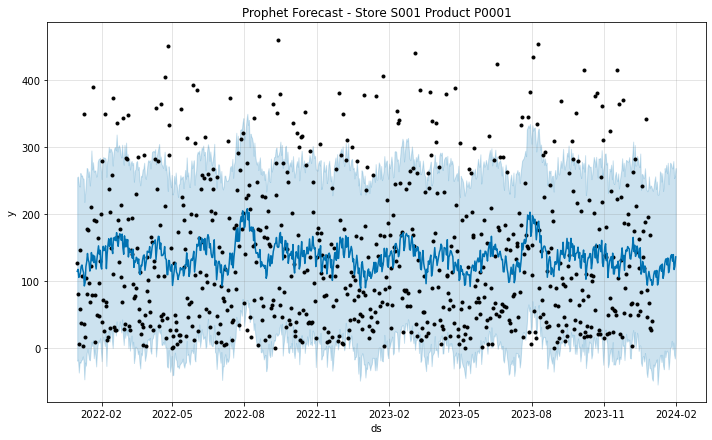

In [18]:
model.plot(forecast)
plt.title(f'Prophet Forecast - Store {store_id} Product {product_id}')
plt.show()

In [ ]:
# Plot components

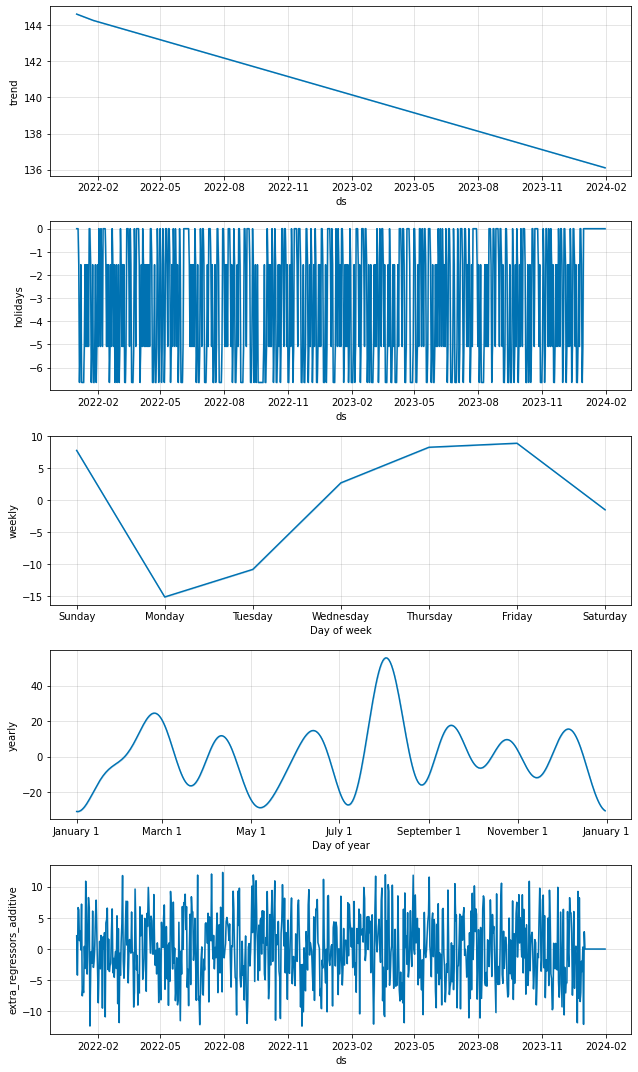

In [19]:
model.plot_components(forecast)
plt.show()